# OLS Recap

- ### The goal of OLS is to find the best linear fit to the data
- ### Coefficients $\beta$ are given by $(\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'y$
- ### Derived from minimizing sum of squares
- ### Also referred to as BLUEs
- ### Called regression when the independent variable is quantitative




── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
`geom_smooth()` using formula = 'y ~ x'


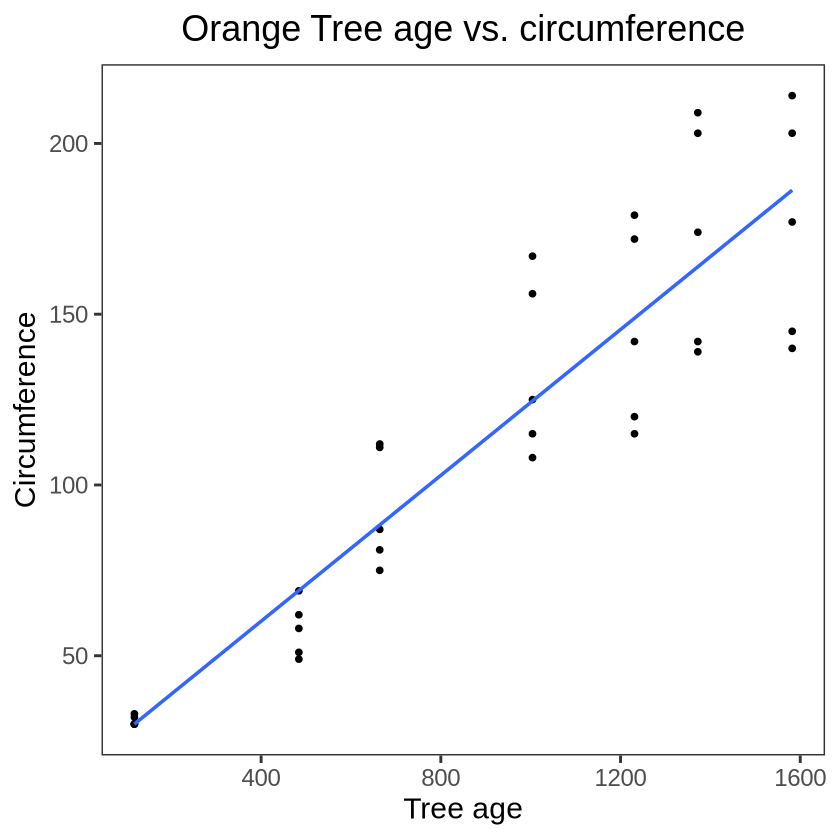

In [1]:
library(tidyverse)
orange.dat <- read.csv("datasets/orange.csv", stringsAsFactors=F)
orange.dat$Tree <- as.factor(orange.dat$Tree)
p1 <- ggplot(orange.dat, aes(x=age, y=circumference)) +
             geom_point() + xlab("Tree age") + ylab("Circumference") +
            ggtitle("Orange Tree age vs. circumference") +
            geom_smooth(method = "lm", se = FALSE) +
            theme_bw(base_size=18) +
            theme(panel.background=element_blank(),
                  panel.grid=element_blank(),
                  plot.title=element_text(hjust=0.5))
p1



---
# OLS Recap

- ### When there are multiple independent variables we use the term multiple linear regression

![](images/mlr.png)
---
# Design matrix $\mathbf{X}$


- ### Relates observations in $y$ to explanatory variables 



### $y_{1} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + e$
### $y_{2} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + e$
### $y_{3} = \mathbf{0}*\mu_{blue} + \mathbf{1}*\mu_{red} + e$
### $y_{4} = \mathbf{0}*\mu_{blue} + \mathbf{1}*\mu_{red} + e$


---
# Design matrix $\mathbf{X}$


- ### Relates observations in $y$ to explanatory variables 



\begin{equation}
  \mathbf{X} =
  \begin{bmatrix}
    1 & 0  \\
    1 & 0 \\
    0 & 1 \\
    0 & 1 \\
  \end{bmatrix}
\end{equation}

---
# Alternative parameterizations


### Cell means 

### $y_{ij} = \mu_{i} + e_{ij}$

\begin{equation}
  \begin{bmatrix}
    1 & 0  \\
    1 & 0 \\
    0 & 1 \\
    0 & 1 \\
  \end{bmatrix}
\end{equation}




### Additive

### $y_{ij} = \mu + \alpha_{i} + e_{ij}$
\begin{equation}
  \begin{bmatrix}
    1 & 0  \\
    1 & 0 \\
    1 & 1 \\
    1 & 1 \\
  \end{bmatrix}
\end{equation}





---
# Design matrix $\mathbf{X}$


- ### We have been building the design matrix for categorical variables, what if the variable is quantitative?





---
# Examples

In [2]:
head(model.matrix(~age, data=orange.dat), n=20)


,(Intercept),age
1,1,118
2,1,484
3,1,664
4,1,1004
5,1,1231
6,1,1372
7,1,1582
8,1,118
9,1,484
10,1,664


In [3]:
head(model.matrix(~age + Tree, data=orange.dat), n=20)

,(Intercept),age,Tree2,Tree3,Tree4,Tree5
1,1,118,0,0,0,0
2,1,484,0,0,0,0
3,1,664,0,0,0,0
4,1,1004,0,0,0,0
5,1,1231,0,0,0,0
6,1,1372,0,0,0,0
7,1,1582,0,0,0,0
8,1,118,1,0,0,0
9,1,484,1,0,0,0
10,1,664,1,0,0,0


In [4]:
head(model.matrix(~age:Tree + Tree, data=orange.dat), n=20)

,(Intercept),Tree2,Tree3,Tree4,Tree5,age:Tree1,age:Tree2,age:Tree3,age:Tree4,age:Tree5
1,1,0,0,0,0,118,0,0,0,0
2,1,0,0,0,0,484,0,0,0,0
3,1,0,0,0,0,664,0,0,0,0
4,1,0,0,0,0,1004,0,0,0,0
5,1,0,0,0,0,1231,0,0,0,0
6,1,0,0,0,0,1372,0,0,0,0
7,1,0,0,0,0,1582,0,0,0,0
8,1,1,0,0,0,0,118,0,0,0
9,1,1,0,0,0,0,484,0,0,0
10,1,1,0,0,0,0,664,0,0,0


`geom_smooth()` using formula = 'y ~ x'


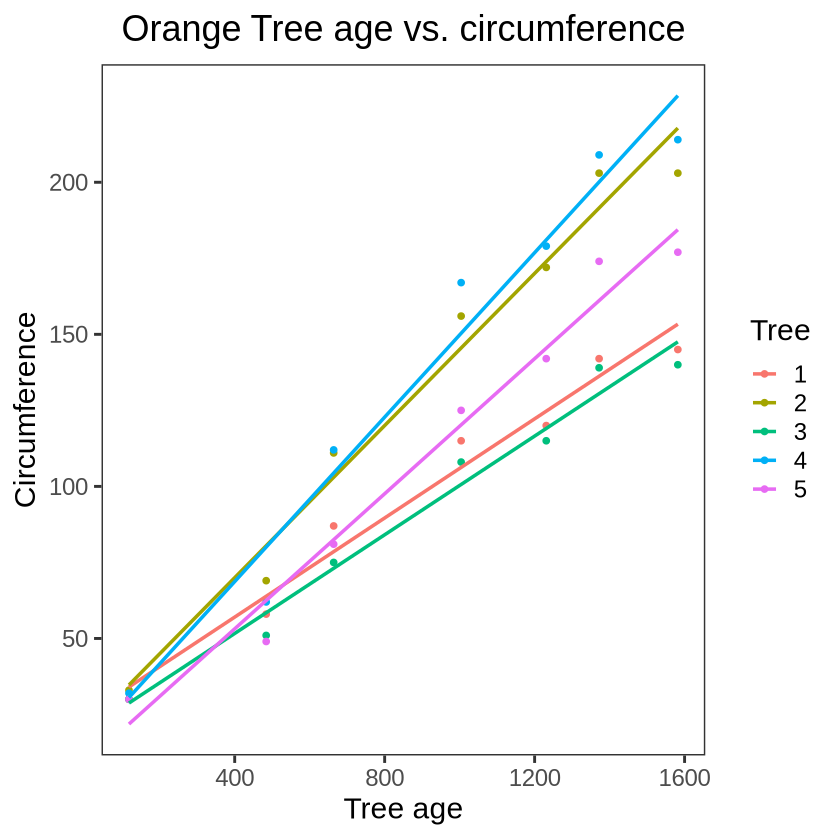

In [5]:
p2 <- ggplot(orange.dat, aes(x=age, y=circumference, color=Tree)) +
             geom_point() + xlab("Tree age") + ylab("Circumference") +
            ggtitle("Orange Tree age vs. circumference") +
            geom_smooth(method = "lm", se = FALSE) +
            theme_bw(base_size=18) +
            theme(panel.background=element_blank(),
                  panel.grid=element_blank(),
                  plot.title=element_text(hjust=0.5))
p2


---
# Model equations

- ### Simple linear regression 
 + ### $y_{i} = \beta_{0} + x\beta_{i1} + e$
 
- ### Multiple linear regression 
 + ### $y_{i}= \beta_{0} + x\beta_{i1} + x\beta_{i2} + x\beta_{i3} + e$
 
---
# Fixed effects model

- ### With OLS we have been estimating fixed effects
- ### $\beta$ does not vary
- ### $y \sim N(\mathbf{X}\beta, \sigma^{2})$


### $y_{1} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + e$
### $y_{2} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + e$
### $y_{3} = \mathbf{0}*\mu_{blue} + \mathbf{1}*\mu_{red} + e$
### $y_{4} = \mathbf{0}*\mu_{blue} + \mathbf{1}*\mu_{red} + e$



---
# How well are we modeling the data?



`geom_smooth()` using formula = 'y ~ x'


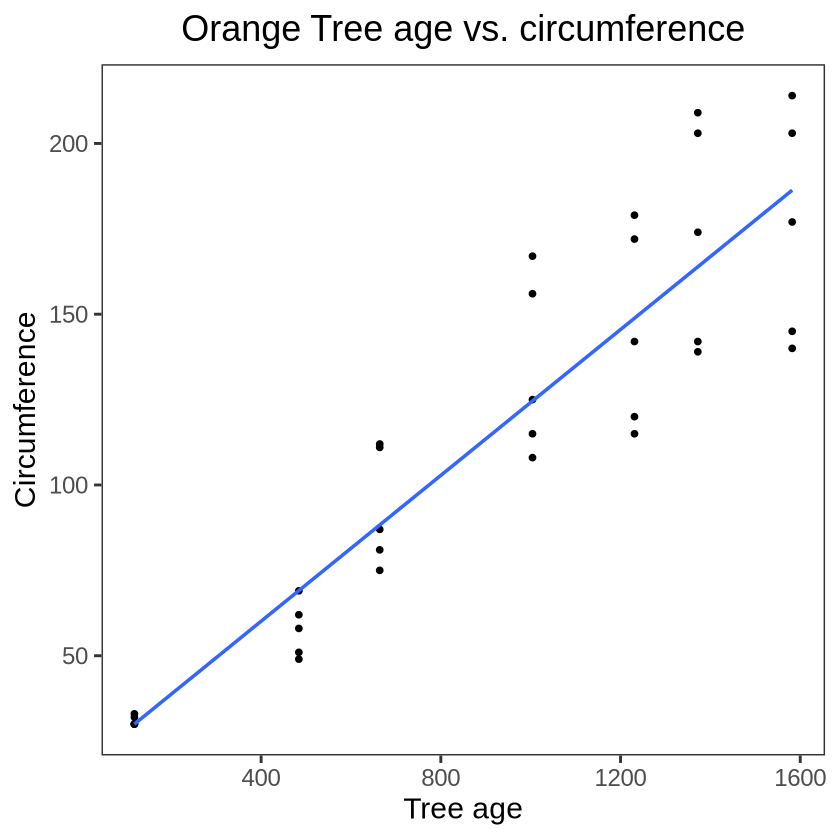

In [6]:
p1

`geom_smooth()` using formula = 'y ~ x'


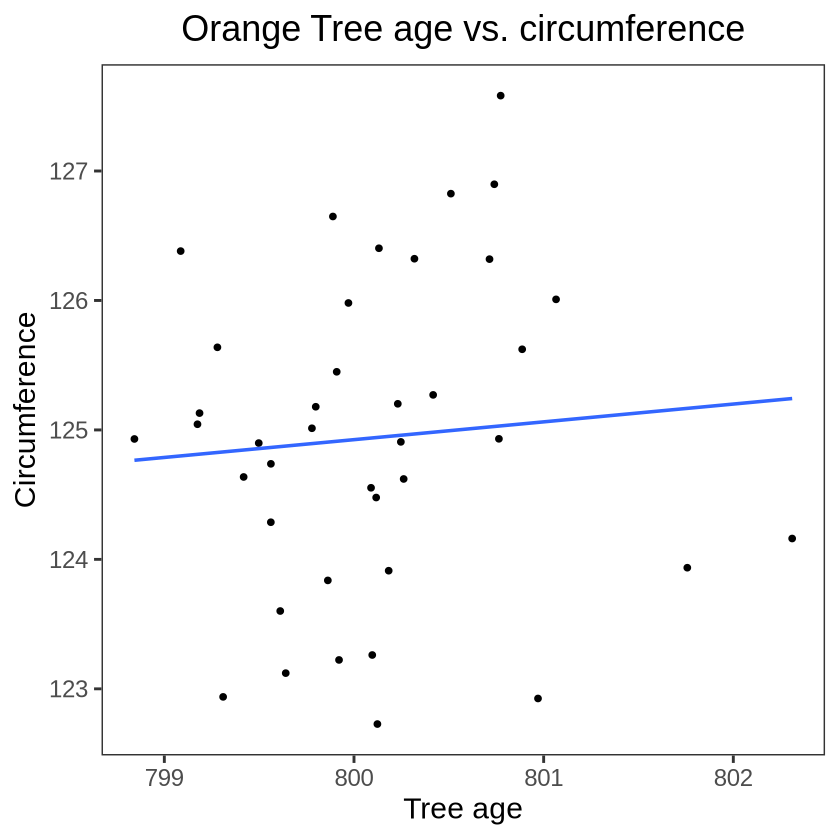

In [7]:
set.seed(100)
bad.dat <- data.frame(age=rnorm(40, 800),
                      circumference=rnorm(40, 125))
p3 <- ggplot(bad.dat, aes(x=age, y=circumference)) +
             geom_point() + xlab("Tree age") + ylab("Circumference") +
            ggtitle("Orange Tree age vs. circumference") +
            geom_smooth(method = "lm", se = FALSE) +
            theme_bw(base_size=18) +
            theme(panel.background=element_blank(),
                  panel.grid=element_blank(),
                  plot.title=element_text(hjust=0.5))
p3


---
# How well are we modeling the data?


- #### $SS_{Total} = (data-mean)^{2}$
- #### $SS_{Error}= (data-line)^{2}$
- #### $R^{2} = \frac{SS_{Total} - SS_{Error}}{SS(Total)}$


![](images/R.png)

```r
SSTotal = (y - mean(y)) ** 2
```

]

---
# How well are we modeling the data?

### $SS_{Total} = SS_{Regression} + SS_{Error}$

### Total variability in y = varibility explained by model + unexplained variability

![](images/table.png)

### **Is the realationship we have modeled significant?**

---
# ANOVA

- ### Analysis of Variance 
- ### The same as regression on dummy variables
               
---
# Hypothesis testing
                                        
- ### Assuming some null hypothesis, how likely is our estimate
 + ### $H_{o}$ = null hypothesis and $H_{a}$ = alternative hypothesis
- ### Examples
 + ### $\beta_{1} = 0$                                      
 + ### $\beta_{1} = \beta_{2}$
 + ### $\mu_{1} = \mu_{2} = \mu_{3} = \mu_{4}$

---
# Hypothesis test 


![](images/tails.jpg)


---
# Z test

### **We take a sample. What is the probablility that our sample mean is different from the poulation mean?**
- ### Sample mean $\bar{x} = 1.702$
- ### Sample size $n=50$
- ### Population mean $\mu=1.700$
- ### Population variance $\sigma^{2}=0.0625$
- ### Standard Error (SE) $\frac{\sigma}{\sqrt(n)}$


\begin{equation}
Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}
\end{equation}

In [8]:
z_stat = (1.702 - 1.7)/(sqrt(0.0625)/sqrt(50))
z_stat


[1] 0.05656854

In [9]:
pval =(1 -pnorm(z_stat)) * 2
pval


[1] 0.9548889


---
# More on Standard errors


- ### Standard deviation is the square root of the sample variance
- ### Standard error (SE) is the square root of sample means variance
- ### In practice SE is estimated from a single sample


[1] "Population sd: 0.99470057084007"


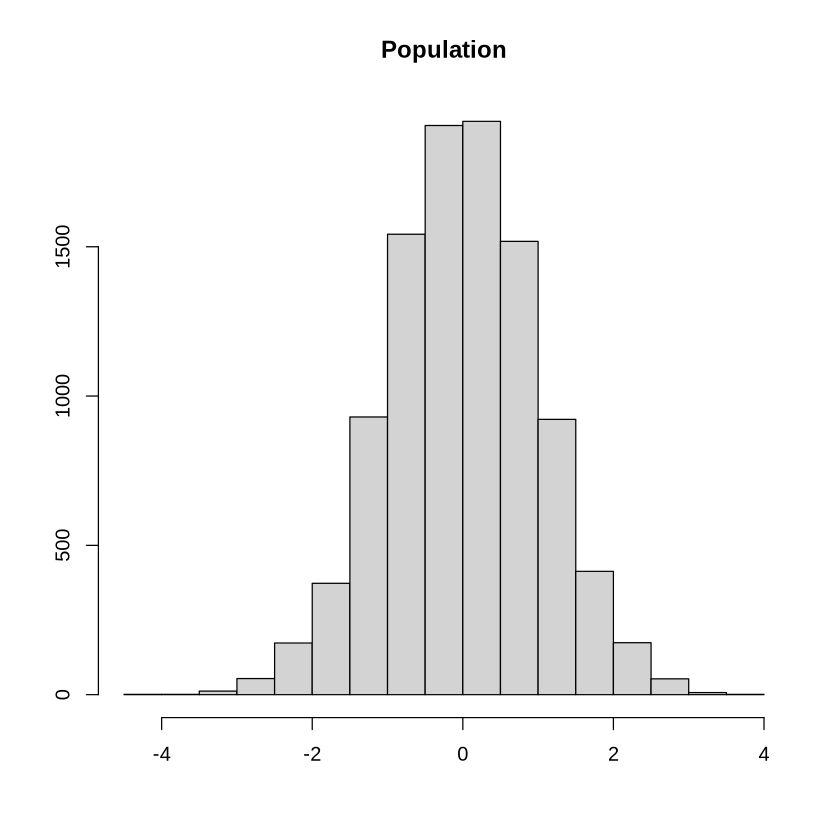

In [10]:
set.seed(100)
pop <- rnorm(10000)
hist(pop, xlab="", ylab="", main="Population")
print(paste("Population sd:", sd(pop)))




---
# More on Standard errors

- ### Standard deviation is the square root of the sample variance
- ### Standard error (SE) is the square root of sample means
- ### In practice SE is estimated from a single sample



[1] 0.3014826

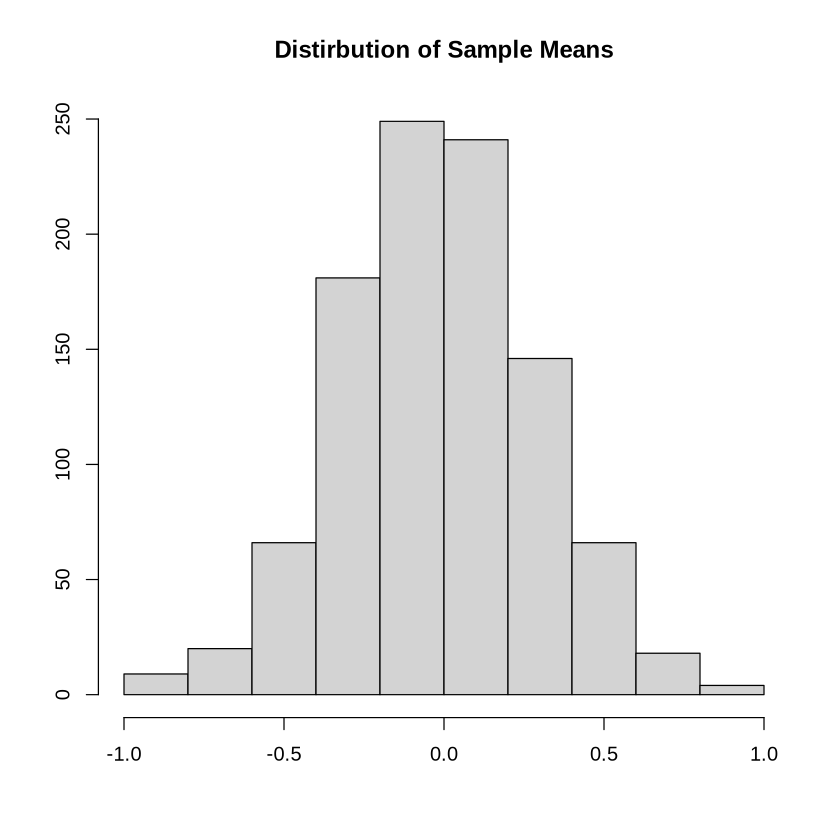

In [11]:
samples <- c()
for(i in 1:1000){
  samples <- c(samples, mean(sample(pop, 10, replace=T)))
}
hist(samples, xlab="", ylab="", main="Distirbution of Sample Means")
sd(samples)



---
# t distribution

- ### In practice we do not know $\sigma$, it must be estimated from our sample $\hat{\sigma}$
- ### Additionally sample sizes are often small
- ### t-distribution better accommodates uncertainty 


![](images/t_dist.png)

---
# Back to our regression model

### **How do we get a p-value?**

![](images/table.png)

---
# F distribution

- ###  F-statistic = $\frac{MSR}{MSE}$
- ### F - distribution is parameterized by $df_{Regression}$ and $df_{Error}$


![](images/f.png)


---
# Model comparison

### Full model

### $y_{i}= \beta_{0} + x\beta_{i1} + x\beta_{i2} + x\beta_{i3} + e$

### Reduced model 

### $y_{i}= \beta_{0} + x\beta_{i1} + e$

\begin{equation}
F = \frac{(SSE(Reduced) - SSE(Full))/ (df_{Reduced} - df_{full})}{SSE(Full)/df_{Full}}
\end{equation}

###  **What is the null hypothesis being tested?**
